## Day 29: Car Service Data Analysis 

For this challenge, you are going to analyze the data of a car 
service business. You will import the car_service_data CSV 
file.

1. Import the car_service_data CSV file. Write a code to 
return all the column names in the DataFrame. Check the 
data types of the DataFrame. 

In [6]:
import pandas as pd 

df = pd.read_csv("car_service_data.csv")
df.head()


,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost,Location
0,1,Oil Change,$25,$50,10,$100,Urban
1,2,Brake Repair,$200,$500,5,$50,Suburban
2,3,Tire Rotation,$30,$75,12,$150,Rural
3,4,Transmission Repair,$1000,$2500,2,$200,Urban
4,5,Battery Replacement,$150,$300,8,$75,Suburban


In [9]:
df.columns

Index(['Service ID', 'Service Type', 'Service Cost', 'Service Revenue',
       'Number of Customers', 'Advertising Cost', 'Location'],
      dtype='object')

In [10]:
# check data types
df.dtypes

Service ID              int64
Service Type           object
Service Cost           object
Service Revenue        object
Number of Customers     int64
Advertising Cost       object
Location               object
dtype: object

2. Which location has the highest service costs? Plot a bar plot 
using Seaborn to visualize the service costs by location. 

In [12]:
# Creating a copy of the DataFrame

df2 = df.copy()

# Creating a function to clean the data
def modify_df(df):
    df["Service Revenue"] = df["Service Revenue"].str.replace("$", "").astype(int)
    df["Service Cost"] = df["Service Cost"].str.replace("$", "").astype(int)
    df["Advertising Cost"] = df["Advertising Cost"].str.replace("$", "").astype(int)
    return df

modify_df(df2)

df2.head()


,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost,Location
0,1,Oil Change,25,50,10,100,Urban
1,2,Brake Repair,200,500,5,50,Suburban
2,3,Tire Rotation,30,75,12,150,Rural
3,4,Transmission Repair,1000,2500,2,200,Urban
4,5,Battery Replacement,150,300,8,75,Suburban


In [13]:
# Group by location 
group_by_location = df2.groupby("Location").sum()

# Sort data by location in ascending order
group_by_location.sort_values(by="Service Cost", ascending=False)


,Service ID,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost
Location,,,,,,
Urban,70,Oil ChangeTransmission RepairAC RechargeDetail...,2225,5350,42,750
Suburban,77,Brake RepairBattery ReplacementSuspension Repa...,2050,4950,67,625
Rural,63,Tire RotationEngine DiagnosticRadiator FlushFu...,655,1650,72,575


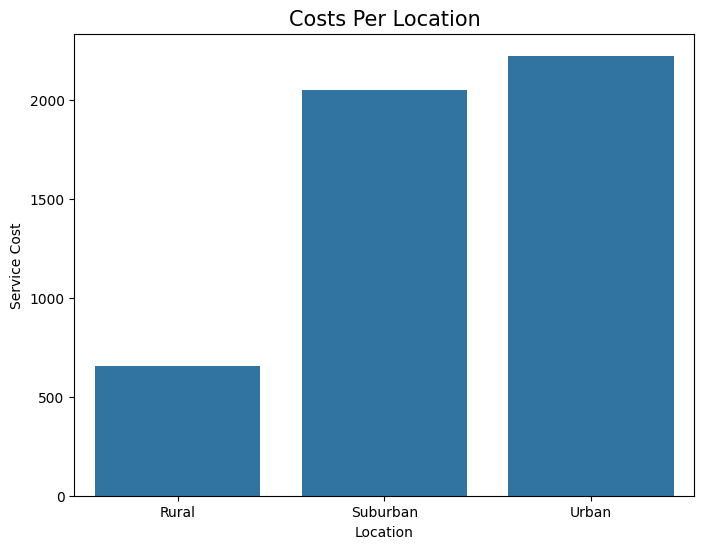

In [14]:
# Use seaborn to plot a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=group_by_location.index,
            y=group_by_location["Service Cost"],
            data=group_by_location)

ax.set_title('Costs Per Location', fontsize=15)
plt.show()

3. Which location has the highest number of customers? 
Using Matplotlib, plot a pie chart of the location and 
number of customers. Present the number of customers as 
percentages. Apply the explode parameter to the location 
with the highest number of customers. Add a shadow to 
your plot. 

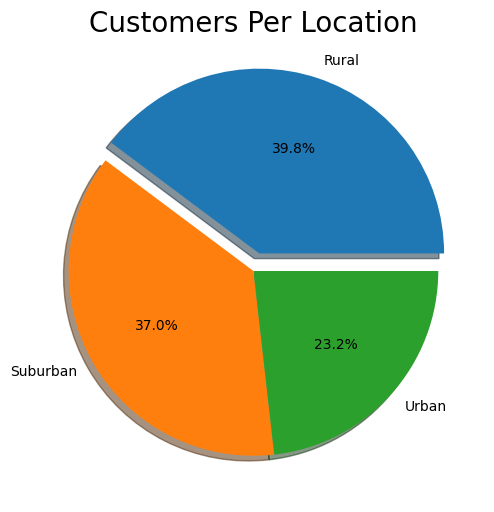

In [22]:
# Grouping the data by location 
df_group = df2.groupby("Location")["Number of Customers"].sum()

plt.figure(figsize=(8, 6))
plt.pie(df_group, explode=(0.1, 0, 0),
        labels=df_group.index,
        autopct='%1.1f%%',
        shadow=True,
        )

plt.title("Customers Per Location", fontsize=20)
plt.show()

4. Using the pandas groupby() method, group the data by 
location and find the average profit margin per location. 
Format your output to 1 decimal place and present it as a 
percentage. 

In [25]:
# calculate the profit 
df2["Profit"] = df2["Service Revenue"] - df2["Service Cost"]

# Calculate the profit margin
df2["Profit Margin"] = df2["Profit"] / df2["Service Revenue"]*100

# Grouping data by products and acalculating mean
df2.groupby("Location")["Profit Margin"].mean().map("{:,.1f}%".format)

Location
Rural       60.4%
Suburban    55.8%
Urban       56.5%
Name: Profit Margin, dtype: object

5. What is the advertising cost of each region as a percentage 
of total revenue? Using the rank() method, rank each 
region by the cost of advertising as a percentage of revenue 
in descending order (add a rank column to the grouped 
data). Which region has the lowest rank? 

In [26]:
# Using groupby to group by location and sum advertising and revenue columns
df_group2 = df2.groupby(["Location"])[["Advertising Cost", "Service Revenue"]].sum()

# Calculating the adversting cost as percentage of revenue
(df_group2["Advertising Cost"]/df_group2["Service Revenue"] * 100).map("{:,.1f}%".format)

Location
Rural       34.8%
Suburban    12.6%
Urban       14.0%
dtype: object

In [27]:
df_group["rank"] = (df_group2["Advertising Cost"]/df_group2
                    ["Service Revenue"]).rank(ascending=False)

df_group2

,Advertising Cost,Service Revenue
Location,,
Rural,575,1650
Suburban,625,4950
Urban,750,5350


In [28]:
df_group2["rank"] = (df_group2["Advertising Cost"]/df_group2
                     ["Service Revenue"]).rank(ascending=False)

df_group2

,Advertising Cost,Service Revenue,rank
Location,,,
Rural,575,1650,1.0
Suburban,625,4950,3.0
Urban,750,5350,2.0
